In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# File to Load
dcp_csv_all = "Datasets/dc_housing_all.csv"

# Read housing Data File and store into Pandas Data Frames
dc_csv = pd.read_csv(dcp_csv_all)

#Step 1 = Drop fields
dc_csv_step1 = dc_csv.drop(
["NumOccupiedHsgUnits",
"NumOccupiedHsgUnits_m",
"start_date",
"end_date",
"PctSameHouse5YearsAgo",
"PctVacantHsgUnitsForRent",
"PctOwnerOccupiedHsgUnits",
"PctVacantHUForRent_m",
"PctOwnerOccupiedHU_m",
"sales_sf",
"MedianMrtgInc1_4m_adj",
"NumMrtgOrigHomePurchPerUnit",
"PctSubprimeConvOrigHomePur",
"forecl_ssl_1Kpcl_sf_condo",
"forecl_ssl_sf_condo",
"trustee_ssl_1Kpcl_sf_condo",
"trustee_ssl_sf_condo",
"PctAnnChgRMPriceSf_1yr",
"PctAnnChgRMPriceSf_5yr",
"PctAnnChgRMPriceSf_10yr",
"indc",
], axis=1)
dc_csv_step1

,timeframe,cluster2017,cluster2017_nf,mprice_sf
0,2012-16,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,X
1,2012-16,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",Cluster 2,X
2,2012-16,"Howard University, Le Droit Park, Cardozo/Shaw",Cluster 3,X
3,2012-16,"Georgetown, Burleith/Hillandale",Cluster 4,X
4,2012-16,"West End, Foggy Bottom, GWU",Cluster 5,X
...,...,...,...,...
1271,2016,Walter Reed,Cluster 40,.
1272,2016,Rock Creek Park,Cluster 41,.
1273,2016,Saint Elizabeths,Cluster 43,.
1274,2016,Joint Base Anacostia-Bolling,Cluster 44,.


In [8]:
#Step 2 = Create df & Clean Median_price datatype. Replace dash with zeros
dc_csv_step2=pd.DataFrame(dc_csv_step1)
dc_csv_step2['mprice_sf']=pd.to_numeric(dc_csv_step2['mprice_sf'], errors='coerce').fillna(0, downcast='infer')
dc_csv_step2['timeframe']=pd.to_numeric(dc_csv_step2['timeframe'], errors='coerce').fillna(0, downcast='infer')
dc_csv_step2

,timeframe,cluster2017,cluster2017_nf,mprice_sf
0,0,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,0
1,0,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",Cluster 2,0
2,0,"Howard University, Le Droit Park, Cardozo/Shaw",Cluster 3,0
3,0,"Georgetown, Burleith/Hillandale",Cluster 4,0
4,0,"West End, Foggy Bottom, GWU",Cluster 5,0
...,...,...,...,...
1271,2016,Walter Reed,Cluster 40,0
1272,2016,Rock Creek Park,Cluster 41,0
1273,2016,Saint Elizabeths,Cluster 43,0
1274,2016,Joint Base Anacostia-Bolling,Cluster 44,0


In [9]:
#Step 3&4 = Limit range to > 2007, Limit price to none zero
year_q_cln=dc_csv_step2['timeframe']>=2007
dc_csv_step3 = dc_csv_step2[year_q_cln]

zero_v=dc_csv_step3['mprice_sf'] != 0
dc_csv_step4 = round(dc_csv_step3[zero_v],0)
dc_csv_step4

,timeframe,cluster2017,cluster2017_nf,mprice_sf
188,2007,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,999950
189,2008,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,1391251
190,2009,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,955000
191,2010,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,1170000
192,2011,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,1455000
...,...,...,...,...
1119,2014,Joint Base Anacostia-Bolling,Cluster 44,310000
1120,2015,Joint Base Anacostia-Bolling,Cluster 44,300000
1139,2012,"Arboretum, Anacostia River",Cluster 46,290000
1140,2013,"Arboretum, Anacostia River",Cluster 46,192000


In [10]:
#Create dataframe and format
dc_prices=pd.DataFrame(dc_csv_step4)

dc_prices.rename(columns = {'timeframe':'Year', 'cluster2017':'Neighborhoods', 
                              'cluster2017_nf':'Cluster','mprice_sf':'Median_Price'}, inplace = True) 

dc_prices

,Year,Neighborhoods,Cluster,Median_Price
188,2007,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,999950
189,2008,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,1391251
190,2009,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,955000
191,2010,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,1170000
192,2011,"Kalorama Heights, Adams Morgan, Lanier Heights",Cluster 1,1455000
...,...,...,...,...
1119,2014,Joint Base Anacostia-Bolling,Cluster 44,310000
1120,2015,Joint Base Anacostia-Bolling,Cluster 44,300000
1139,2012,"Arboretum, Anacostia River",Cluster 46,290000
1140,2013,"Arboretum, Anacostia River",Cluster 46,192000


In [11]:
dc_prices.Median_Price.describe()

count    4.130000e+02
mean     5.878894e+05
std      3.388659e+05
min      1.750000e+05
25%      2.950000e+05
50%      4.900000e+05
75%      8.100000e+05
max      1.930000e+06
Name: Median_Price, dtype: float64

Text(0, 0.5, 'Median Price')

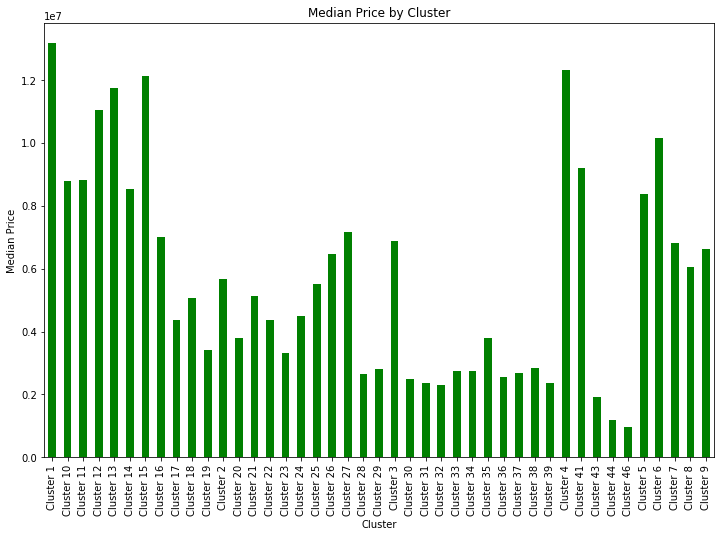

In [22]:
# Generate a bar plot showing number of data points for each cluster using pandas
sum_house_Cluster1 = dc_prices.groupby(['Cluster'])["Median_Price"].sum()

#sum_house_Cluster1 = sum_house_Cluster1.sort_values(['Median_Price'])

house_graph = sum_house_Cluster1.plot(kind="bar", facecolor="green",figsize=(12,8))

plt.title('Median Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Price')

Text(0, 0.5, 'Median Price')

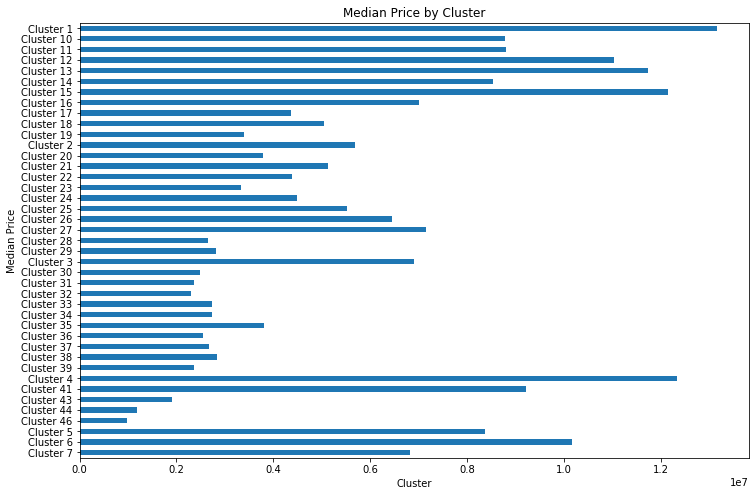

In [23]:
# Generate a bar plot showing number of data points for each cluster using pandas
sum_house_Cluster2 = dc_prices.groupby(['Cluster'])["Median_Price"].sum().sort_index()

ax = sum_house_Cluster2.iloc[:41].plot(kind="barh",figsize=(12,8))
ax.invert_yaxis()

plt.title('Median Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Price')

Text(0, 0.5, 'Cluster')

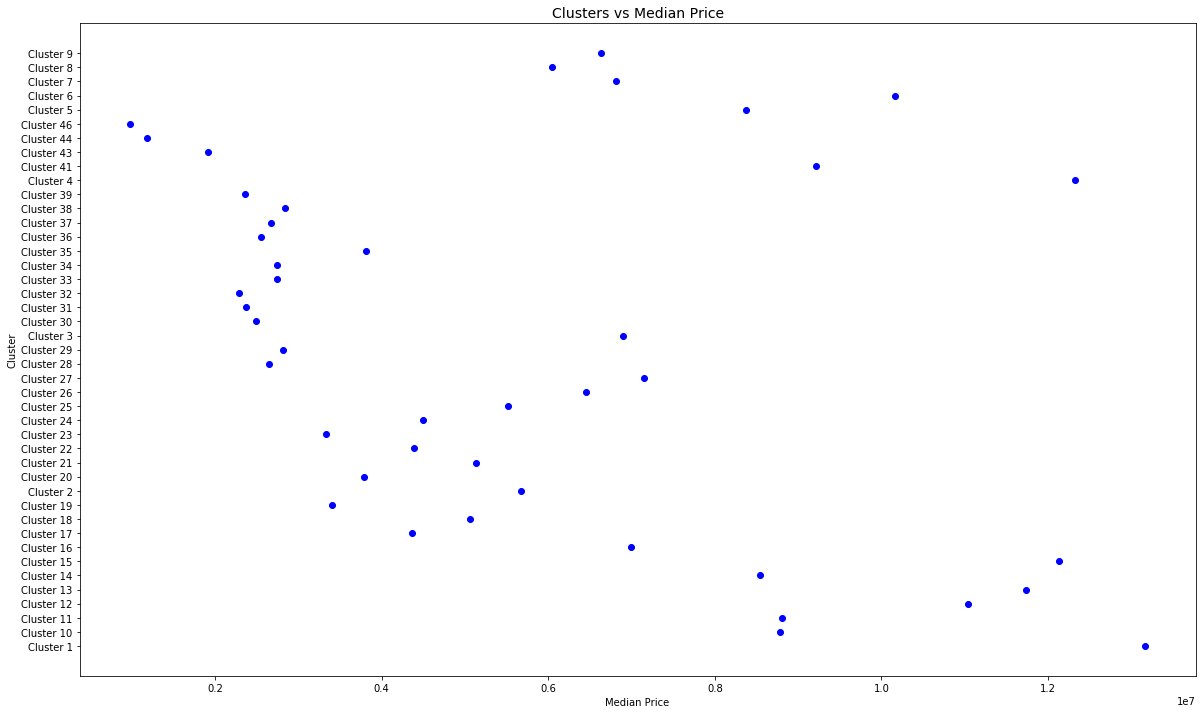

In [24]:
  # Generate a scatter plot 
sum_house_Cluster3 = dc_prices.groupby(['Cluster'])["Median_Price"].sum().reset_index()

plt.figure(figsize=(20, 12))
plt.scatter(x=sum_house_Cluster3["Median_Price"], y=sum_house_Cluster3["Cluster"],color='blue', marker='o')
plt.title("Clusters vs Median Price",fontsize=14)
plt.xlabel("Median Price")
plt.ylabel("Cluster")       

Text(0, 0.5, 'Median Price')

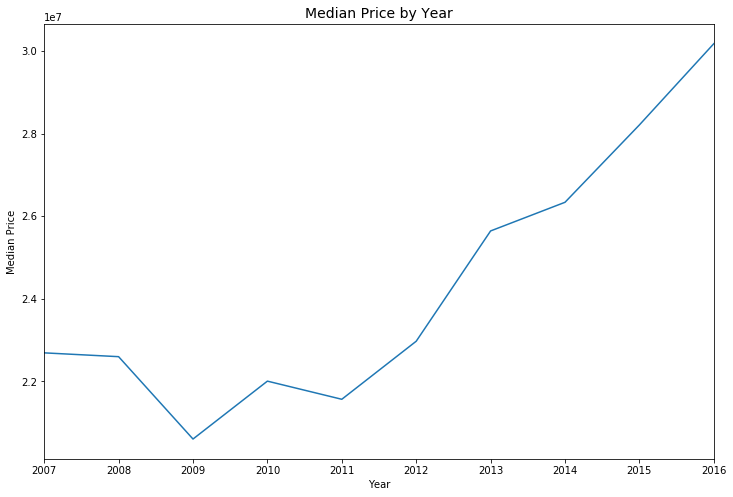

In [25]:
# Generate a line plot
sum_house_Cluster4 = dc_prices.groupby(['Year'])["Median_Price"].sum()

ax=sum_house_Cluster4.plot(x="Year", y=["Median_Price"],figsize=(12,8))
ax.set_title("Median Price by Year", fontsize=14)
plt.ylabel("Median Price")

Text(0.5, 0, 'Median Price')

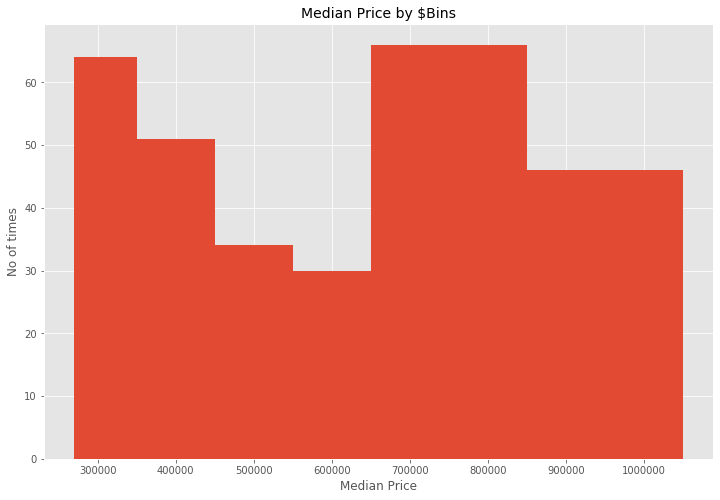

In [26]:
x=dc_prices['Median_Price']
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.hist(x, bins=[270000,350000,450000,550000,650000,850000,1050000])
plt.title("Median Price by $Bins",fontsize=14)
plt.ylabel('No of times')
plt.xlabel('Median Price')